In [1]:
import numpy as np
from numpy import set_printoptions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif

In [2]:
df1 = pd.read_csv('Dataset of Diabetes .csv')

In [3]:
df1.head(20)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
5,634,34224,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
6,721,34225,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N
7,421,34227,M,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,N
8,670,34229,M,43,2.6,67,4.0,3.8,0.9,2.4,3.7,1.0,21.0,N
9,759,34230,F,32,3.6,28,4.0,3.8,2.0,2.4,3.8,1.0,24.0,N


In [4]:
df1.shape

(1000, 14)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [6]:
df1['AGE']

0      50
1      26
2      50
3      50
4      33
       ..
995    71
996    31
997    30
998    38
999    54
Name: AGE, Length: 1000, dtype: int64

In [7]:
print(df1['Gender'].value_counts())
print(df1['CLASS'].value_counts())

M    565
F    434
f      1
Name: Gender, dtype: int64
Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64


# Dealing with Categorical Features

    Since our dataset has an object feature 'Gender', i would be encoding it to a numerical feature and then can care of the one instance misinterpeted by 'f' instead of the upper case 'F' as in Female.

    I will also be taking care of 'CLASS' feature as it is categorical, i would be encoding it to a numerical feature, without the use of a label encoder tho, i will be doing it with just the simple .replace( function

In [8]:
df1.iloc[:,2] = df1['Gender'].replace(('F', 'f', 'M'), (0,0,1))
df1.iloc[:,13] = df1['CLASS'].replace(('N', 'N ', 'P', 'Y', 'Y '), (0, 0, 1, 2, 2))

In [9]:
df1.describe()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,0.565000,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020,1.741000
std,240.397673,3.380758e+06,0.496005,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388,0.631124
min,1.000000,1.230000e+02,0.000000,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,0.000000
25%,125.750000,2.406375e+04,0.000000,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,2.000000
50%,300.500000,3.439550e+04,1.000000,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,2.000000
75%,550.250000,4.538425e+04,1.000000,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,2.000000
max,800.000000,7.543566e+07,1.000000,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000,2.000000


In [10]:
#for missing values percent
def get_numerical_summary(df1):
    total = df1.shape[0]
    missing_columns = [col for col in df1.columns if df1[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df1[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent
missing_percent = get_numerical_summary(df1)

In [11]:
missing_percent

{}

In [12]:
df1.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [13]:
df1.duplicated().sum()

0

# Let's perform some Univariate Analysis on our Dataset

In [14]:
"""for col in df1.columns.to_list():
    sns.catplot(data= df1, x=col, kind = 'count', legend = True , palette ='Dark2', height =7)
    plt.show()"""

"for col in df1.columns.to_list():\n    sns.catplot(data= df1, x=col, kind = 'count', legend = True , palette ='Dark2', height =7)\n    plt.show()"

In [15]:
""""df1.hist(bins=50, figsize=(20,12))
    plt.title(col)
    plt.show()"""


'"df1.hist(bins=50, figsize=(20,12))\n    plt.title(col)\n    plt.show()'

In [16]:
'''for col in df1.columns.to_list():
    df1[col].plot(kind= 'density')
    plt.title(col)
    plt.show()'''

"for col in df1.columns.to_list():\n    df1[col].plot(kind= 'density')\n    plt.title(col)\n    plt.show()"

# Bivariate Analysis 

In [17]:
'''for col in df1.columns.to_list():
    fig1 = sns.FacetGrid(df1 ,hue = 'CLASS', aspect = 5)
    fig1.map(sns.kdeplot, col, shade = True)
    oldest = df1[col].max()
    fig1.set(xlim=(0,oldest))
    fig1.add_legend()'''

"for col in df1.columns.to_list():\n    fig1 = sns.FacetGrid(df1 ,hue = 'CLASS', aspect = 5)\n    fig1.map(sns.kdeplot, col, shade = True)\n    oldest = df1[col].max()\n    fig1.set(xlim=(0,oldest))\n    fig1.add_legend()"

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


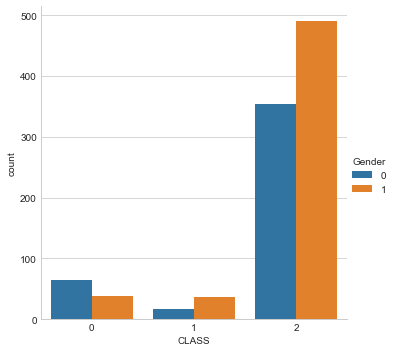

In [18]:
sns.catplot('CLASS',data= df1,hue='Gender',kind = "count")

In [19]:
X = df1.copy()
Y = X.pop('CLASS')

In [20]:
X

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0
996,671,876534,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2
997,669,87654,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4
998,99,24004,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5


In [21]:
discrete_features = X.dtypes == int

In [22]:
discrete_features.dtypes

dtype('bool')

In [23]:


def make_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_classif(X, Y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, Y, discrete_features)
mi_scores  # show a few features with their MI scores

HbA1c        0.401144
BMI          0.296201
AGE          0.221630
No_Pation    0.191035
Chol         0.070881
VLDL         0.064550
Cr           0.054779
ID           0.053282
TG           0.052643
Urea         0.043790
LDL          0.033888
HDL          0.024539
Gender       0.000000
Name: MI Scores, dtype: float64

### A barh plot to show the Mutual information scores

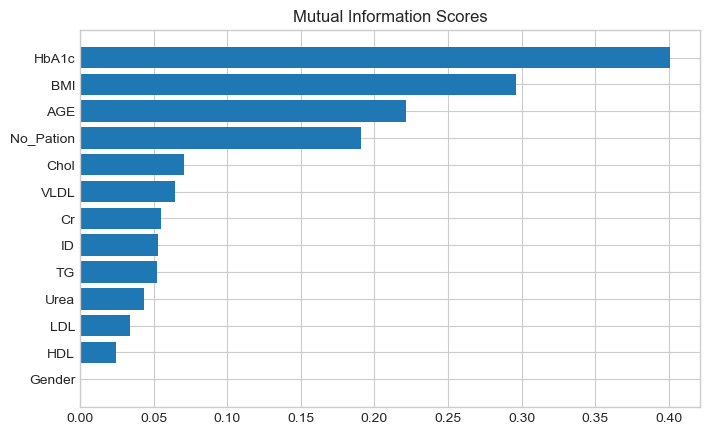

In [24]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [25]:
'''corrmat = df1.corr()
k = 13 #number for the 10 top largest movers of the Absenteeism of employees in hours

plt.figure(figsize=(20,20))
plt.title('Top 10 movers')
cols = corrmat.nlargest(k, 'CLASS')['CLASS'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()'''

"corrmat = df1.corr()\nk = 13 #number for the 10 top largest movers of the Absenteeism of employees in hours\n\nplt.figure(figsize=(20,20))\nplt.title('Top 10 movers')\ncols = corrmat.nlargest(k, 'CLASS')['CLASS'].index\ncm = np.corrcoef(df1[cols].values.T)\nsns.set(font_scale=1.25)\nhm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)\nplt.show()"

In [26]:
df1.groupby('CLASS')['HbA1c', "Cr", 'No_Pation'].mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4112\2028789809.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby('CLASS')['HbA1c', "Cr", 'No_Pation'].mean()


,HbA1c,Cr,No_Pation
CLASS,,,
0,4.560194,62.796117,815851.990291
1,6.003774,66.075472,64299.037736
2,8.878270,69.873223,216955.928910


In [27]:
df1.groupby('CLASS')['HbA1c', "Cr", 'No_Pation'].median()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4112\1734163516.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby('CLASS')['HbA1c', "Cr", 'No_Pation'].median()


,HbA1c,Cr,No_Pation
CLASS,,,
0,4.9,55.0,34294.0
1,6.0,59.0,45384.0
2,8.8,60.5,34395.5


In [28]:
df1.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [29]:
minmaxscaler = MinMaxScaler(feature_range = (0,1))
scaled_df1 = minmaxscaler.fit_transform(X)
scaledx1 = pd.DataFrame(scaled_df1).values

In [30]:
scaler = StandardScaler()
rescaled_df1 = scaler.fit_transform(scaledx1)
RescaledX1 = pd.DataFrame(rescaled_df1).values


In [31]:
normalizer = Normalizer()
normalized_df3 = normalizer.fit_transform(RescaledX1)
Normalizedx1 = pd.DataFrame(normalized_df3, columns = X.columns)

In [32]:
Normalizedx1.head(3)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0.202141,-0.022480,-0.342747,-0.120641,-0.043542,-0.115086,-0.401486,-0.153209,-0.311294,0.544571,-0.326443,-0.111262,-0.338221
1,0.381953,-0.016270,0.204125,-0.728154,-0.049541,-0.026940,-0.310565,-0.207914,-0.157742,-0.036917,-0.106407,-0.079712,-0.308531
2,0.101089,-0.020125,-0.348200,-0.122560,-0.044234,-0.116916,-0.407873,-0.155646,-0.316246,0.553234,-0.331636,-0.113032,-0.343602


In [33]:
'''for col in df4.columns.to_list():
    df1[col].plot(kind= 'density')
    plt.title(col)
    plt.show()'''

"for col in df4.columns.to_list():\n    df1[col].plot(kind= 'density')\n    plt.title(col)\n    plt.show()"

In [34]:
df4 = Normalizedx1.drop('ID', axis = 1)

In [35]:
Y.value_counts()

2    844
0    103
1     53
Name: CLASS, dtype: int64

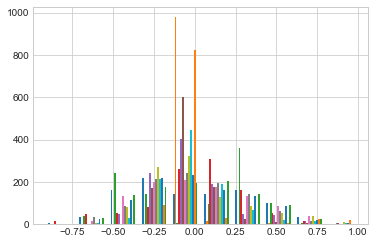

In [36]:
plt.hist(Normalizedx1)
plt.show()

In [37]:
X2 = df4


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size = .20,  random_state = 4)

In [115]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [119]:
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [127]:
Y_train_smote.value_counts()

2    676
1    676
0    676
Name: CLASS, dtype: int64

In [44]:
'''poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X2)'''


'poly_features = PolynomialFeatures(degree=2, include_bias=False)\nX_poly = poly_features.fit_transform(X2)'

In [45]:
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
("lin_reg", LogisticRegression())])

In [177]:
polynomial_regression2 = Pipeline([
("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
("clf", RandomForestClassifier(n_estimators = 7, n_jobs = -1 ))])

In [117]:
polynomial_regression3 = Pipeline([
("poly_features", PolynomialFeatures(degree=6, include_bias=False)),
("lgb_model", lgb.LGBMClassifier(n_estimators = 16))])

In [47]:
'''polynomial_regression.fit(X_train, Y_train)
result = polynomial_regression.score(X_test, Y_test)
print('Accuracy: {}'.format(result*100.0))'''

"polynomial_regression.fit(X_train, Y_train)\nresult = polynomial_regression.score(X_test, Y_test)\nprint('Accuracy: {}'.format(result*100.0))"

In [187]:
polynomial_regression2.fit(X_train_smote, Y_train_smote)
result = polynomial_regression2.score(X_test, Y_test)
print('Accuracy: {}'.format(result*100.0))

Accuracy: 92.5


In [120]:
polynomial_regression3.fit(X_train_smote, YM_train_smote)
result = polynomial_regression3.score(X_test, Y_test)
print('Accuracy: {}'.format(result*100.0))

Accuracy: 93.0


In [193]:
result = cross_val_score(polynomial_regression2, X_train_smote, Y_train_smote, cv=6)
print(result.std()*100.0)
print(result.mean()*100.0)
print(result*100.0)

0.8483555490180117
98.0276134122288
[97.33727811 96.74556213 99.40828402 98.22485207 98.52071006 97.92899408]


In [122]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_smote,Y_train_smote)

SVC()

In [123]:
Ysv_pred = svc_model.predict(X_test)

In [124]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Ysv_pred))

              precision    recall  f1-score   support

           0       0.61      0.85      0.71        20
           1       0.50      0.42      0.45        12
           2       0.98      0.95      0.96       168

    accuracy                           0.91       200
   macro avg       0.70      0.74      0.71       200
weighted avg       0.92      0.91      0.91       200



In [58]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
("svm_clf", SVC(kernel="poly", degree=2, coef0=1, C=1.22))
])
#poly_kernel_svm_clf.fit(X_train, Y_train)


In [59]:
#Y_pred =poly_kernel_svm_clf.predict(X_test)

In [60]:
#from sklearn import metrics
#print('Accuracy :',metrics.accuracy_score(Y_test, Y_pred)*100.0)

In [61]:
#param_grid = {'C': [0.001, 0.1, 0.9,1.22, 1.5, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'degg' 'kernel': ['rbf']} 

In [62]:
#from sklearn.model_selection import GridSearchCV

In [63]:
#grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [64]:
#grid.fit(X_train,y_train)

In [65]:

#result = cross_val_predict(polynomial_regression2, X_test, Y_test, cv=kf)


In [66]:
#print(confusion_matrix(Y_test,result))

In [67]:
#print(classification_report(Y_test,Y_pred))

In [68]:
from sklearn.model_selection import KFold

In [69]:
k = 3
kf = KFold(n_splits= k, random_state = 14 ,shuffle = True)

In [70]:
rbf_kernel_svm_clf = Pipeline([
("svm_clf", SVC(kernel="rbf", gamma=.999, C=.9))
])
#rbf_kernel_svm_clf.fit(X_train, Y_train)

In [71]:
#rbf_Ypred= rbf_kernel_svm_clf.predict(X_test)

In [72]:
#from sklearn import metrics
#print('Accuracy :',metrics.accuracy_score(Y_test, rbf_Ypred)*100.0)

In [73]:
'''result = cross_val_score(rbf_kernel_svm_clf, X_test, Y_test, cv=kf)
print(result.std()*100.0)
print(result.mean()*100.0)
print(result*100.0)'''

'result = cross_val_score(rbf_kernel_svm_clf, X_test, Y_test, cv=kf)\nprint(result.std()*100.0)\nprint(result.mean()*100.0)\nprint(result*100.0)'

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0)
#gbrt.fit(X_train, Y_train)

In [103]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
lgb.LGBMClassifier(n_estimators = 16),
algorithm="SAMME.R", learning_rate=.005)
ada_clf.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=LGBMClassifier(n_estimators=16),
                   learning_rate=0.005)

In [101]:
'''gbrt_Ypred= gbrt.predict(X_test)
from sklearn import metrics
print('Accuracy :',metrics.accuracy_score(Y_test, gbrt_Ypred)*100.0)'''

"gbrt_Ypred= gbrt.predict(X_test)\nfrom sklearn import metrics\nprint('Accuracy :',metrics.accuracy_score(Y_test, gbrt_Ypred)*100.0)"

In [104]:
ada_Ypred= ada_clf.predict(X_test)
from sklearn import metrics
print('Accuracy :',metrics.accuracy_score(Y_test, ada_Ypred)*100.0)

Accuracy : 96.0


In [80]:
import xgboost
xgb_class = xgboost.XGBClassifier()
xgb_class.fit(X_train, Y_train)
y_pred = xgb_class.predict(X_test)

In [81]:
xgb_pred = cross_val_predict(xgb_class, X_test, Y_test, cv=kf)

In [82]:
print(classification_report(Y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        20
           1       0.33      0.08      0.13        12
           2       0.95      0.96      0.96       168

    accuracy                           0.91       200
   macro avg       0.66      0.65      0.62       200
weighted avg       0.89      0.91      0.89       200



In [85]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(n_estimators = 500)
default_params = lgb_model.get_params()

In [86]:
del default_params['n_estimators']

In [87]:
train_set = lgb.Dataset(data = X_train, label = Y_train)
test_set = lgb.Dataset(data = X_test, label = Y_test)

In [88]:
cv_results = lgb.cv(default_params, train_set, num_boost_round = 10000, early_stopping_rounds = 100, metrics = 'auc', nfold = 5, seed = 42)

C:\Users\DELL\anaconda3\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\DELL\anaconda3\lib\site-packages\lightgbm\basic.py:1487: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'


[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 12
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [89]:
print('The maximum validation ROC AUC was: {:.5f} with a standard deviation of {:.5f}.'.format(cv_results['auc-mean'][-1], cv_results['auc-stdv'][-1]))
print('The optimal number of boosting rounds (estimators) was {}.'.format(len(cv_results['auc-mean'])))

The maximum validation ROC AUC was: 0.97803 with a standard deviation of 0.00816.
The optimal number of boosting rounds (estimators) was 16.


In [90]:
from sklearn.metrics import roc_auc_score

In [91]:
lgb_model.n_estimators = len(cv_results['auc-mean'])

In [200]:
lgb_model.fit(X_train_smote, Y_train_smote)

LGBMClassifier(n_estimators=16)

In [201]:
lgb_preds = lgb_model.predict(X_test)

In [202]:
print(classification_report(Y_test, lgb_preds))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.75      0.75      0.75        12
           2       0.99      0.98      0.98       168

    accuracy                           0.95       200
   macro avg       0.85      0.88      0.86       200
weighted avg       0.96      0.95      0.96       200



In [95]:
from sklearn.ensemble import VotingClassifier

In [112]:
voting_clf = VotingClassifier(
estimators=[('polynomial_regression', polynomial_regression), ('polynomial_regression2', polynomial_regression2), ('polynomial_regression3', polynomial_regression3), ('poly_kernel_svm_clf', poly_kernel_svm_clf), ('rbf_kernel_svm_clf', rbf_kernel_svm_clf), ('gbrt', gbrt), ('ada_clf', ada_clf), ('xgb_class', xgb_class) , ('svc_model', svc_model),('lgb_model', lgb_model) ],
voting='hard')
voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('polynomial_regression',
                              Pipeline(steps=[('poly_features',
                                               PolynomialFeatures(include_bias=False)),
                                              ('lin_reg',
                                               LogisticRegression())])),
                             ('polynomial_regression2',
                              Pipeline(steps=[('poly_features',
                                               PolynomialFeatures(include_bias=False)),
                                              ('clf',
                                               RandomForestClassifier(n_estimators=7,
                                                                      n_jobs=-1))])),
                             ('polynomial_regression3',
                              Pi...
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_bin=256, max_cat_to_onehot=4,
                                            max_delta_step=0, max_depth=6,
                                            max_leaves=0, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=0,
                                            num_parallel_tree=1,
                                            objective='multi:softprob',
                                            predictor='auto', random_state=0,
                                            reg_alpha=0, ...)),
                             ('svc_model', SVC()),
                             ('lgb_model', LGBMClassifier(n_estimators=16))])

In [203]:
result = cross_val_score(voting_clf, X_train_smote, Y_train_smote, cv=6)
print(result.std()*100.0)
print(result.mean()*100.0)
print(result*100.0)

0.8265806022800885
98.17554240631164
[97.63313609 97.04142012 99.40828402 97.92899408 99.11242604 97.92899408]


In [114]:
from sklearn.metrics import accuracy_score
for clf in (lgb_model, polynomial_regression, polynomial_regression3, polynomial_regression2,  poly_kernel_svm_clf,  rbf_kernel_svm_clf,  gbrt,  ada_clf, xgb_class, svc_model,  voting_clf):
    clf.fit(X_train, Y_train)
    VC_Ypred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, VC_Ypred))


LGBMClassifier 0.945
Pipeline 0.92
Pipeline 0.95
Pipeline 0.905
Pipeline 0.935
Pipeline 0.92
GradientBoostingClassifier 0.94
AdaBoostClassifier 0.96
XGBClassifier 0.96
SVC 0.92
VotingClassifier 0.94


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
ohe = OneHotEncoder()

In [ ]:

model.add(Dense(12, input_dim= 12))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.1), use_bias= False))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.1), use_bias = False))
model.add(BatchNormalization())
model.add(Dense(5, activation = 'relu',kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.1),  use_bias = False))
model.add(Dense(3, activation = 'softmax',))

In [ ]:
model.add(Dense(13,activation = 'elu', input_dim= 13))
model.add(Dense(4, activation = 'relu', use_bias= False))
model.add(Dense(3, activation = 'relu',  use_bias = False))
model.add(Dense(3, activation = 'relu', use_bias = False))
model.add(Dense(3, activation = 'softmax'))
keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [234]:
import keras

In [374]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense, BatchNormalization
from keras.optimizers import SGD


In [392]:
model = Sequential()

In [409]:
model.add(Dense(12, input_dim= 12))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'relu', use_bias= False))
model.add(BatchNormalization())
model.add(Dense(5, activation = 'relu',  use_bias = False))
model.add(BatchNormalization())
model.add(Dense(3, activation = 'relu',  use_bias = False))
model.add(Dense(3, activation = 'softmax',))

In [410]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 12)                156       
                                                                 
 batch_normalization_27 (Bat  (None, 12)               48        
 chNormalization)                                                
                                                                 
 dense_46 (Dense)            (None, 6)                 72        
                                                                 
 batch_normalization_28 (Bat  (None, 6)                24        
 chNormalization)                                                
                                                                 
 dense_47 (Dense)            (None, 3)                 18        
                                                                 
 batch_normalization_29 (Bat  (None, 3)               

In [411]:
X3 = df1.drop('CLASS', axis = 1)
Y3 = pd.get_dummies(Y
                  )

In [412]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y, test_size = .20,  random_state = 4)

In [413]:
X2_train.shape

(800, 12)

In [414]:
X_train_smote, Y_train_smote = smote.fit_resample(X2_train, Y2_train)

In [415]:
Y_train_smote_dummy=pd.get_dummies(Y_train_smote)

In [416]:
Y2_test_dummy = pd.get_dummies(Y2_test)

In [417]:
Y2_test_dummy.shape

(200, 3)

In [418]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y, test_size = .20, )

In [419]:
learning_rate = 0.001
weight_decay = 1e-6
momentum = 0.9

In [420]:
sgd = SGD(learning_rate=learning_rate, decay=weight_decay, nesterov=True)

In [421]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=30,
restore_best_weights=True)

In [441]:
model.compile(loss="categorical_crossentropy", optimizer= sgd, metrics=["accuracy"])

In [423]:
history = model.fit(X_train_smote, Y_train_smote_dummy, epochs=300, validation_data=(X2_test, Y2_test_dummy), callbacks = early_stopping_cb)


Epoch 1/300
64/64 [==============================] - 8s 27ms/step - loss: 1.2094 - accuracy: 0.1750 - val_loss: 1.3311 - val_accuracy: 0.1000
Epoch 2/300
64/64 [==============================] - 1s 10ms/step - loss: 1.0785 - accuracy: 0.1795 - val_loss: 1.4550 - val_accuracy: 0.0950
Epoch 3/300
64/64 [==============================] - 1s 10ms/step - loss: 0.9959 - accuracy: 0.2648 - val_loss: 1.4155 - val_accuracy: 0.0500
Epoch 4/300
64/64 [==============================] - 1s 10ms/step - loss: 0.9461 - accuracy: 0.4995 - val_loss: 1.3167 - val_accuracy: 0.0600
Epoch 5/300
64/64 [==============================] - 1s 11ms/step - loss: 0.9342 - accuracy: 0.5611 - val_loss: 1.2021 - val_accuracy: 0.0900
Epoch 6/300
64/64 [==============================] - 1s 11ms/step - loss: 0.9061 - accuracy: 0.6026 - val_loss: 1.1035 - val_accuracy: 0.7650
Epoch 7/300
64/64 [==============================] - 1s 10ms/step - loss: 0.8914 - accuracy: 0.6460 - val_loss: 1.0669 - val_accuracy: 0.8350
Epoch 

64/64 [==============================] - 1s 13ms/step - loss: 0.6351 - accuracy: 0.8264 - val_loss: 0.7592 - val_accuracy: 0.8950
Epoch 59/300
64/64 [==============================] - 1s 12ms/step - loss: 0.6214 - accuracy: 0.8358 - val_loss: 0.7508 - val_accuracy: 0.9000
Epoch 60/300
64/64 [==============================] - 1s 13ms/step - loss: 0.6109 - accuracy: 0.8353 - val_loss: 0.7466 - val_accuracy: 0.9000
Epoch 61/300
64/64 [==============================] - 1s 12ms/step - loss: 0.6149 - accuracy: 0.8353 - val_loss: 0.7420 - val_accuracy: 0.9050
Epoch 62/300
64/64 [==============================] - 1s 13ms/step - loss: 0.6019 - accuracy: 0.8417 - val_loss: 0.7375 - val_accuracy: 0.9000
Epoch 63/300
64/64 [==============================] - 1s 13ms/step - loss: 0.5908 - accuracy: 0.8466 - val_loss: 0.7313 - val_accuracy: 0.9050
Epoch 64/300
64/64 [==============================] - 1s 11ms/step - loss: 0.6065 - accuracy: 0.8368 - val_loss: 0.7346 - val_accuracy: 0.9000
Epoch 65/300

64/64 [==============================] - 1s 12ms/step - loss: 0.5059 - accuracy: 0.8624 - val_loss: 0.5902 - val_accuracy: 0.9000
Epoch 116/300
64/64 [==============================] - 1s 12ms/step - loss: 0.5111 - accuracy: 0.8536 - val_loss: 0.5778 - val_accuracy: 0.9000
Epoch 117/300
64/64 [==============================] - 1s 13ms/step - loss: 0.4918 - accuracy: 0.8679 - val_loss: 0.5785 - val_accuracy: 0.9000
Epoch 118/300
64/64 [==============================] - 1s 12ms/step - loss: 0.4790 - accuracy: 0.8718 - val_loss: 0.5844 - val_accuracy: 0.8950
Epoch 119/300
64/64 [==============================] - 1s 13ms/step - loss: 0.4872 - accuracy: 0.8693 - val_loss: 0.5795 - val_accuracy: 0.8950
Epoch 120/300
64/64 [==============================] - 1s 12ms/step - loss: 0.5136 - accuracy: 0.8575 - val_loss: 0.5756 - val_accuracy: 0.8950
Epoch 121/300
64/64 [==============================] - 1s 11ms/step - loss: 0.4973 - accuracy: 0.8609 - val_loss: 0.5742 - val_accuracy: 0.8950
Epoch 

Epoch 172/300
64/64 [==============================] - 1s 11ms/step - loss: 0.4449 - accuracy: 0.8743 - val_loss: 0.5059 - val_accuracy: 0.8900
Epoch 173/300
64/64 [==============================] - 1s 11ms/step - loss: 0.4200 - accuracy: 0.8871 - val_loss: 0.5061 - val_accuracy: 0.8950
Epoch 174/300
64/64 [==============================] - 1s 11ms/step - loss: 0.4328 - accuracy: 0.8846 - val_loss: 0.5070 - val_accuracy: 0.8950
Epoch 175/300
64/64 [==============================] - 1s 11ms/step - loss: 0.4310 - accuracy: 0.8812 - val_loss: 0.4983 - val_accuracy: 0.8950
Epoch 176/300
64/64 [==============================] - 1s 11ms/step - loss: 0.4342 - accuracy: 0.8748 - val_loss: 0.5038 - val_accuracy: 0.9000
Epoch 177/300
64/64 [==============================] - 1s 11ms/step - loss: 0.4414 - accuracy: 0.8738 - val_loss: 0.4967 - val_accuracy: 0.8950
Epoch 178/300
64/64 [==============================] - 1s 11ms/step - loss: 0.4503 - accuracy: 0.8634 - val_loss: 0.4939 - val_accuracy:

Epoch 229/300
64/64 [==============================] - 1s 13ms/step - loss: 0.3869 - accuracy: 0.8930 - val_loss: 0.4488 - val_accuracy: 0.9100
Epoch 230/300
64/64 [==============================] - 1s 13ms/step - loss: 0.4082 - accuracy: 0.8792 - val_loss: 0.4429 - val_accuracy: 0.9050
Epoch 231/300
64/64 [==============================] - 1s 12ms/step - loss: 0.3978 - accuracy: 0.8871 - val_loss: 0.4487 - val_accuracy: 0.9150
Epoch 232/300
64/64 [==============================] - 1s 12ms/step - loss: 0.3901 - accuracy: 0.8891 - val_loss: 0.4544 - val_accuracy: 0.9000
Epoch 233/300
64/64 [==============================] - 1s 13ms/step - loss: 0.4068 - accuracy: 0.8812 - val_loss: 0.4495 - val_accuracy: 0.9100
Epoch 234/300
64/64 [==============================] - 1s 12ms/step - loss: 0.3876 - accuracy: 0.8925 - val_loss: 0.4484 - val_accuracy: 0.8950
Epoch 235/300
64/64 [==============================] - 1s 12ms/step - loss: 0.4022 - accuracy: 0.8826 - val_loss: 0.4489 - val_accuracy:

Epoch 286/300
64/64 [==============================] - 1s 13ms/step - loss: 0.4057 - accuracy: 0.8797 - val_loss: 0.3992 - val_accuracy: 0.9050
Epoch 287/300
64/64 [==============================] - 1s 12ms/step - loss: 0.3543 - accuracy: 0.9063 - val_loss: 0.4041 - val_accuracy: 0.9050
Epoch 288/300
64/64 [==============================] - 1s 12ms/step - loss: 0.3650 - accuracy: 0.9009 - val_loss: 0.3958 - val_accuracy: 0.9100
Epoch 289/300
64/64 [==============================] - 1s 12ms/step - loss: 0.3652 - accuracy: 0.8974 - val_loss: 0.4042 - val_accuracy: 0.9050
Epoch 290/300
64/64 [==============================] - 1s 13ms/step - loss: 0.3611 - accuracy: 0.8960 - val_loss: 0.4052 - val_accuracy: 0.9050
Epoch 291/300
64/64 [==============================] - 1s 13ms/step - loss: 0.3654 - accuracy: 0.8964 - val_loss: 0.4044 - val_accuracy: 0.9050
Epoch 292/300
64/64 [==============================] - 1s 12ms/step - loss: 0.3747 - accuracy: 0.8920 - val_loss: 0.3961 - val_accuracy:

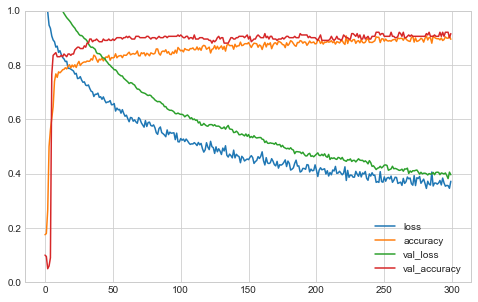

In [424]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [ ]:
model2 = keras.wrappers.scikit_learn.KerasClassifier(model)

In [437]:
polynomial_regression4 = Pipeline([
("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
("model", bb)])

In [443]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV
scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
}

In [ ]:

polynomial_regression2 = Pipeline([
("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
("clf", RandomForestClassifier(n_estimators = 7, n_jobs = -1 ))])

In [452]:
clf = RandomForestClassifier()

In [453]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
"n_estimators": [0, 1, 2, 3, 5, 7, 10, 16],

"n_jobs":[-1, 1, 2, 3]
}
grid_search = GridSearchCV(clf, param_distribs, cv=5,
scoring=scorers,  refit = 'accuracy_score',
)


In [454]:
grid_search.fit(X_train_smote, Y_train_smote)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 155

ValueError: n_estimators must be greater than zero, got 0.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20,  random_state = 4)
'''XP_train, XP_test, YP_train, YP_test = train_test_split(X_poly, Y, test_size = .20,  random_state = 4)'''

In [ ]:
t

In [ ]:
def plot_learning_curves(model, X, Y):
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")


In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, Y_train)


In [ ]:
sgd_clf.predict(X_test)


In [ ]:
result = sgd_clf.score(X_test, Y_test)
print('Accuracy: {}'.format(result*100.0))

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train, cv=3)

In [ ]:
Xx = df1.drop('CLASS', axis =1).values
Yx = df1['CLASS']
def perform_rescale_standardize_Normalize(X, rescale = None, standardize = None, Normalize = None):
    
 
        
    def scaler(X2):
        if scaler ==True:
            minmaxscaler = MinMaxScaler(feature_range = (0,1))
            scaled_df1 = minmaxscaler.fit_transform(X2)
            scaledx1 = pd.DataFrame(scaled_df1).values
        

    def rescaled(scaledx1):
        if rescaled==True:
            scaler = StandardScaler()
            rescaled_df1 = scaler.fit_transform(scaledx1)
            RescaledX1 = pd.DataFrame(rescaled_df1).values
            return rescaled_df1    

    def normalize(Rs):
        if normalize ==True:
            normalizer = Normalizer()
            normalized_df3 = normalizer.fit_transform(X2)
            Normalizedx1 = pd.DataFrame(normalized_df3)
        
        
        return Normalizedx1
        
        
        return Normalizedx1
    
    if rescale == True:
        scaledx1 = scaler(X2=Xx)
        
    if standardize == True:
        Rescaledx1 = rescaled(scaledx1= scaledx1)
    
    if Normalize == True:
        Normalizedx1= normalize(Rs = rescaled_df1)

In [ ]:
perform_rescale_standardize_Normalize(X=Xx, rescale = True, standardize = True, Normalize = True)

In [ ]:
Xx = df1.drop('CLASS', axis =1).values
Yx = df1['CLASS']
class scaledx():
    def scaler(X2):
        if scaler ==True:
            minmaxscaler = MinMaxScaler(feature_range = (0,1))
            scaled_df1 = minmaxscaler.fit_transform(X2)
            scaledx1 = pd.DataFrame(scaled_df1).values
        return scaledx1

    def rescaled(scaledx1):
        if rescaled==True:
            scaler = StandardScaler()
            rescaled_df1= scaler.fit_transform(X2)
            RescaledX1 = pd.DataFrame(rescaled_df1)
        return RescaledX1

    def normalize(RescaledX1):
        if normalize ==True:
            normalizer = Normalizer()
            normalized_df3 = normalizer.fit_transform(X2)
            Normalizedx1 = pd.DataFrame(normalized_df3)
        return normalizedx1
        
        
        return Normalizedx1


In [ ]:
perform_rescale_standardize_Normalize(X=Xx, rescale = True, standardize = True, Normalize = True)

In [ ]:
df4 = pd.DataFrame(scaledx(X = X2, scaler=False, rescaled =False, normalize= True), columns= df1.drop('CLASS', axis=1).columns)

In [ ]:
df4.describe()

In [ ]:
for col in df4.columns.to_list():
    df1[col].plot(kind= 'density')
    plt.title(col)
    plt.show()

In [ ]:
def rescale(X2):
    minmaxscaler = MinMaxScaler(feature_range = (0,1))
    scaled_df1 = minmaxscaler.fit_tra`nsform(X2)
    scaledx = pd.DataFrame(scaled_df1)
    return scaledx

In [ ]:
rescale(X2)

In [ ]:
def standardize(scaledx):
    scaler = StandardScaler()
    rescaled_df1= scaler.fit_transform(scaledx)
    RescaledX = pd.DataFrame(rescaled_df1, columns = X2.columns)
    return RescaledX

In [ ]:
def Normalize(RescaledX):
    normalizer = Normalizer()
    normalized_df3 = normalizer.fit_transform(RescaledX)
    Normalizedx = pd.DataFrame(normalized_df3, columns = X2.columns)
    return Normalizedx

In [ ]:
X2 = df1.copy().values
Y2 = df1['CLASS']
def scaledx(X=None):
    minmaxscaler = MinMaxScaler(feature_range = (0,1))
    scaled_df1 = minmaxscaler.fit_transform(X2)
    scaledx1 = pd.DataFrame(scaled_df1).values
    return scaledx1

In [ ]:
X2 = df1.copy().values
Y2 = df1['CLASS']
def scaledx(X=None):
    minmaxscaler = MinMaxScaler(feature_range = (0,1))
    scaled_df1 = minmaxscaler.fit_transform(X2)
    scaledx1 = pd.DataFrame(scaled_df1).values
    return scaledx1

def RescaledX(X=None):
    scaler = StandardScaler()
    rescaled_df1= scaler.fit_transform(scaledx1)
    RescaledX1 = pd.DataFrame(rescaled_df1)
    return RescaledX1

def Normalizedx(X = None):
    normalizer = Normalizer()
    normalized_df3 = normalizer.fit_transform(RescaledX)
    Normalizedx1 = pd.DataFrame(normalized_df3, columns = X2.columns)
    return Normalizedx1

def perform_rescale_standardize_Normalize(X, rescale = None, standardize = None, Normalize = None):
    
    if rescale == True:
        scaledx1 = scaledx(X=X2)
        
    if standardize == True:
        Rescaledx1 = RescaledX(X=scaledx1)
    
    if Normalize == True:
        Normalized= Normalize(X= Rescaledx1)

    
    
    

In [ ]:
perform_rescale_standardize_Normalize(X=X2, rescale = None, standardize = None, Normalize = None)
    
    

In [ ]:
perform_rescale_standardize_Normalize(X=X2, rescale = True, standardize = True, Normalize = True)

In [ ]:
scaledx(X=X2)

In [ ]:
RescaledX(X=scaledx1)

In [ ]:
t

In [ ]:
df1['CLASS'].unique()

In [ ]:
df1.isna().sum()

In [ ]:
df1.iloc[:,13] = df1['CLASS'].replace(('N', 'N ', 'P', 'Y', 'Y '), (0, 0, 1, 2, 2))

In [ ]:
df1.head()

In [ ]:
df1.info()

In [ ]:
df1.describe()

In [ ]:
plt.hist(df1.No_Pation)
plt.show()

plt.hist(df1.AGE)
plt.show()

plt.hist(df1.Urea)
plt.show()

plt.hist(df1.Cr)
plt.show()

plt.hist(df1.HbA1c)
plt.show()

plt.hist(df1.Chol)
plt.show()

plt.hist(df1.TG)
plt.show()

plt.hist(df1.HDL)
plt.show()

plt.hist(df1.LDL)
plt.show()

plt.hist(df1.VLDL)
plt.show()

plt.hist(df1.BMI)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_x_2 = LabelEncoder()
df1.iloc[:, 2] = labelencoder_x_2.fit_transform(df1.iloc[:,2])

In [ ]:
df2 = df1.loc[ : ,['ID','No_Pation', 'Gender','AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI','CLASS']]

In [ ]:
df2

In [ ]:
df3 = df1.loc[ : ,['ID','No_Pation','Gender','AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']]

In [ ]:
file = df2

In [ ]:
file.to_csv('df2.csv')

In [ ]:
plt.hist(df3)
plt.show()
figure = plt.figure(figsize=(40,6))

In [ ]:
array = df2.values



In [ ]:
array

In [ ]:
df2.head()

In [ ]:
x = array[:,:13]
y = array[:,13]

scaler = MinMaxScaler(feature_range=(0,1))
RescaledX = scaler.fit_transform(x)

set_printoptions(precision = 3)


In [ ]:
RescaledX = pd.DataFrame(RescaledX, columns = ['ID','No_Pation', 'Gender','AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI'])

In [ ]:
RescaledX

In [ ]:
RescaledX.describe()

In [ ]:
plt.hist(RescaledX)
plt.show()

In [ ]:
 array2 = RescaledX.values

XS = array2[:,0:13]
YS = array[:,13]

scaler = StandardScaler().fit(XS)
standardX = scaler.transform(XS)

set_printoptions(precision = 3)
print(standardX[:, :5])

In [ ]:
standardX = pd.DataFrame(standardX)

In [ ]:
standardX

In [ ]:
standardX.describe()

In [ ]:
plt.hist(standardX)
plt.show()
figure = plt.figure(figsize=(40,6))


In [ ]:
standardX.describe()

In [ ]:
array3 = standardX.values


In [ ]:
XN = array3[:, 0:]
YN = array[:13]

scaler = Normalizer().fit(XN)
NormalizedX = scaler.transform(XN)

set_printoptions(precision = 3)
print(NormalizedX[:,0:5])

In [ ]:
NormalizedX = pd.DataFrame(NormalizedX, columns = ['ID','No_Pation', 'Gender','AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI'])
NormalizedX

In [ ]:
NormalizedX.describe()



In [ ]:
plt.hist(NormalizedX)
plt.show()

In [ ]:
 df4 =  NormalizedX 

In [ ]:
df4.head(4)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
array4 = df4.values
XM = array4[:,:13]
YM = array[:,13]

In [ ]:
XM_train, XM_test, YM_train, YM_test = train_test_split(XM, YM, test_size = .20,  random_state = 4)

In [ ]:
XM_train_smote, YM_train_smote = smote.fit_resample(XM_train, YM_train)

In [ ]:
Model1 = LogisticRegression(max_iter = 1000)
Model1.fit(XM_train_smote, YM_train_smote)
result = Model1.score(XM_test, YM_test)
print('Accuracy: {}'.format(result*100.0))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut


In [ ]:
array4 = df4.values
XM = array4[:,:13]
YM = array[:,13]
k = 3
kf = KFold(n_splits= k, random_state = 7 ,shuffle = True)
clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1 )

result = cross_val_score(clf, XM, YM, cv=kf)
print(result.std()*100.0)
print(result.mean()*100.0)
print(result*100.0)

In [ ]:
array4 = df4.values
XM = array4[:,:13]
YM = array[:,13]
k = 3

loocv = LeaveOneOut()
clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1 )

result = cross_val_score(clf, XM, YM, cv=loocv)
print(result.std()*100.0)
print(result.mean()*100.0)

In [ ]:
array4 = df4.values
XM = array4[:,:13]
YM = array[:,13]
k = 2
model = LogisticRegression(max_iter = 1000)
loocv = LeaveOneOut()


result = cross_val_score(model, XM, YM, cv=loocv)
print(result.std()*100.0)
print(result.mean()*100.0)

In [ ]:
clf = RandomForestClassifier(n_estimators = 500, n_jobs = 1)
model = LogisticRegression()
clf.fit(XM_train, YM_train)

In [ ]:
YM_pred = clf.predict(XM_test)

In [ ]:
result = clf.score(XM, YM)

In [ ]:
from sklearn import metrics
print('Accuracy :',metrics.accuracy_score(YM_test, YM_pred)*100.0)

In [ ]:
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(512, activation = 'relu', input_dim = 13, ))

In [ ]:
classifier.add(Dense(1, activation = 'sigmoid'))

In [ ]:
classifier.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [ ]:
classifier.summary()

In [ ]:
from keras.optimizers import RMSprop
opt = RMSprop(lr= 0.1, decay= 1e-6)
classifier.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
classifier.fit(XM_train, YM_train, validation_split = .2 , validation_data = (XM_test, YM_test),epochs =10 ,verbose = 1, batch_size = 9)

In [ ]:
df4

In [ ]:
clf.compile(optimizers= 'adams', loss = 'binary_crossentropy', metrics = ['accuracy']